Notes from reading in one second intervals
['C5', 'D5', 'B4', 'F#5', 'D5', 'C#5', 'D5', 'D5', 'F#5']


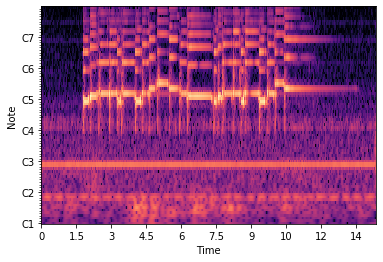

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import librosa
import librosa.display
import librosa.feature
import numpy as np

y, sr = librosa.load('/Users/jackcui/projects/librosa_tests/sample2.wav') #load file

C = np.abs(librosa.cqt(y, sr=sr)) #get cqt values

librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                        sr=sr, x_axis='time', y_axis='cqt_note')

maxes = C.max(axis = 0) 
maxes_ind = C.argmax(axis = 0) 

#shift index up 1
for i in range (len(maxes_ind)):
    maxes_ind[i] += 1

notes_second = []
time = int(librosa.get_duration(y=y, sr=sr))
one_second = int(len(maxes_ind) // time)
curr_ind = 0

#print(maxes_ind)

for i in range (time):
    if maxes[curr_ind] > 0.3: #guess for amplitude
        notes_second.append(bin_to_note(maxes_ind[curr_ind]))
        curr_ind += one_second
    else:
        curr_ind += one_second

print("Notes from reading in one second intervals")
print(notes_second)

In [87]:
#checks every point in time, uses magnitude and note to figure out if new note is being played
notes_trial = []
notes_indexes = []
notes_mag = []
prev_note = ""
prev_note_mag = 0

for i in range (len(maxes_ind)):
    curr_note = bin_to_note(maxes_ind[i])
    curr_note_mag = maxes[i]
    
    if curr_note_mag > 1.0: #guessing these values, testing what seems to work
        if curr_note_mag > prev_note_mag + 0.9:
            notes_trial.append(curr_note)
            prev_note = curr_note
            prev_note_mag = curr_note_mag
        elif curr_note != prev_note:
            notes_trial.append(curr_note)
            notes_mag.append(maxes[i])
            #notes_indexes.append(maxes_ind[i])
            prev_note = curr_note
            prev_note_mag = curr_note_mag
        else:
            prev_note = curr_note
            prev_note_mag = curr_note_mag
        
print("Notes from new method")
print(notes_trial)
print("Actual Notes")
act_notes = ['B4','C#5','D5','D5','B4','D5','B4','D5','E5','F#5','E5','D5','C#5','B4','C#5','D5','D5',
            'B4','D5','B4','D5','F#5','E5']
print(act_notes)

#print(" ")
#print(notes_indexes)
print("Magnitudes of Notes ")
print(notes_mag)

Notes from new method
['C5', 'B4', 'C5', 'C#5', 'D5', 'D5', 'C5', 'B4', 'C5', 'D5', 'C5', 'B4', 'B4', 'D5', 'E5', 'F#5', 'E5', 'D5', 'C5', 'C#5', 'C5', 'B4', 'C#5', 'C5', 'C#5', 'D5', 'C5', 'B4', 'B4', 'D5', 'C5', 'B4', 'D5', 'F#5', 'E5']
Actual Notes
['B4', 'C#5', 'D5', 'D5', 'B4', 'D5', 'B4', 'D5', 'E5', 'F#5', 'E5', 'D5', 'C#5', 'B4', 'C#5', 'D5', 'D5', 'B4', 'D5', 'B4', 'D5', 'F#5', 'E5']
Magnitudes of Notes 
[2.0867116, 2.0167947, 1.0906206, 1.4569453, 1.5703708, 1.7447183, 1.4515072, 1.9336293, 1.4837561, 1.0033635, 1.0629818, 1.1885977, 1.600736, 1.0908405, 1.6835017, 1.5384097, 2.0798693, 1.909837, 1.2309732, 1.6530777, 1.7075237, 1.2870734, 1.7785858, 1.6786963, 1.4359323, 2.1462815, 1.3707813, 1.0939875, 1.2639483]


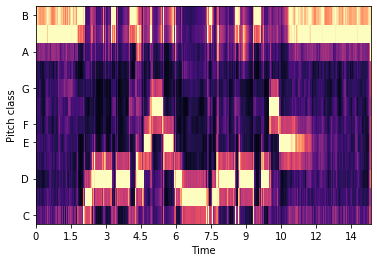

In [31]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

In [57]:
import IPython.display as ipd
ipd.Audio('/Users/jackcui/projects/librosa_tests/sample2.wav')

In [ ]:
#converts bin (1-84) to note
def bin_to_note(num):
    oct_count = 1
    curr = num
    
    while curr > 12:
        curr = curr - 12
        oct_count += 1
    
    if curr == 1:
        return "C" + str(oct_count)
    elif curr == 2:
        return "C#" + str(oct_count)
    elif curr == 3:
        return "D" + str(oct_count)
    elif curr == 4:
        return "D#" + str(oct_count)
    elif curr == 5:
        return "E" + str(oct_count)
    elif curr == 6:
        return "F" + str(oct_count)
    elif curr == 7:
        return "F#" + str(oct_count)
    elif curr == 8:
        return "G" + str(oct_count)
    elif curr == 9:
        return "G#" + str(oct_count)
    elif curr == 10:
        return "A" + str(oct_count)
    elif curr == 11:
        return "A#" + str(oct_count)
    else:
        return "B" + str(oct_count)
    
